In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
baseDir = r'.\Data'
li = []
for fileName in os.listdir(baseDir):
    currentFilePath = os.path.join(baseDir, fileName)
    df1 = pd.read_csv(currentFilePath, header=None)
    df1[0] = fileName
    li.append(df1)
    break
df = pd.concat(li)
df[0].unique()

array(['1.csv'], dtype=object)

In [3]:
df.head()

,0,1,2,3,4
0,1.csv,1502,2215,2153,1
1,1.csv,1667,2072,2047,1
2,1.csv,1611,1957,1906,1
3,1.csv,1601,1939,1831,1
4,1.csv,1643,1965,1879,1


In [4]:
df[4].value_counts()

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
0        1
Name: 4, dtype: int64

In [5]:
data = df.drop(0,axis=1)

In [6]:
for i in range(1,8):
    df1 = data[data[4] == i]
    df1.shape
    x = df1.drop(4,axis=1).corr()
    print("class =",i,"\n",x,"\n")

class = 1 
           1         2         3
1  1.000000  0.596766  0.247424
2  0.596766  1.000000  0.125288
3  0.247424  0.125288  1.000000 

class = 2 
           1         2         3
1  1.000000 -0.207055  0.021436
2 -0.207055  1.000000  0.009652
3  0.021436  0.009652  1.000000 

class = 3 
           1         2         3
1  1.000000 -0.046288  0.416320
2 -0.046288  1.000000  0.095226
3  0.416320  0.095226  1.000000 

class = 4 
           1         2         3
1  1.000000 -0.379553  0.198044
2 -0.379553  1.000000  0.119425
3  0.198044  0.119425  1.000000 

class = 5 
           1         2         3
1  1.000000 -0.174205  0.205224
2 -0.174205  1.000000  0.178245
3  0.205224  0.178245  1.000000 

class = 6 
           1         2         3
1  1.000000 -0.373584  0.335123
2 -0.373584  1.000000  0.081953
3  0.335123  0.081953  1.000000 

class = 7 
           1         2         3
1  1.000000  0.202308  0.251564
2  0.202308  1.000000 -0.151852
3  0.251564 -0.151852  1.000000 



In [14]:
d = df.drop(0,axis = 1)
d.tail()

,1,2,3,4
162496,1927,2388,2074,7
162497,1930,2383,2074,7
162498,1929,2385,2076,7
162499,1926,2385,2078,7
162500,1922,2387,2078,0


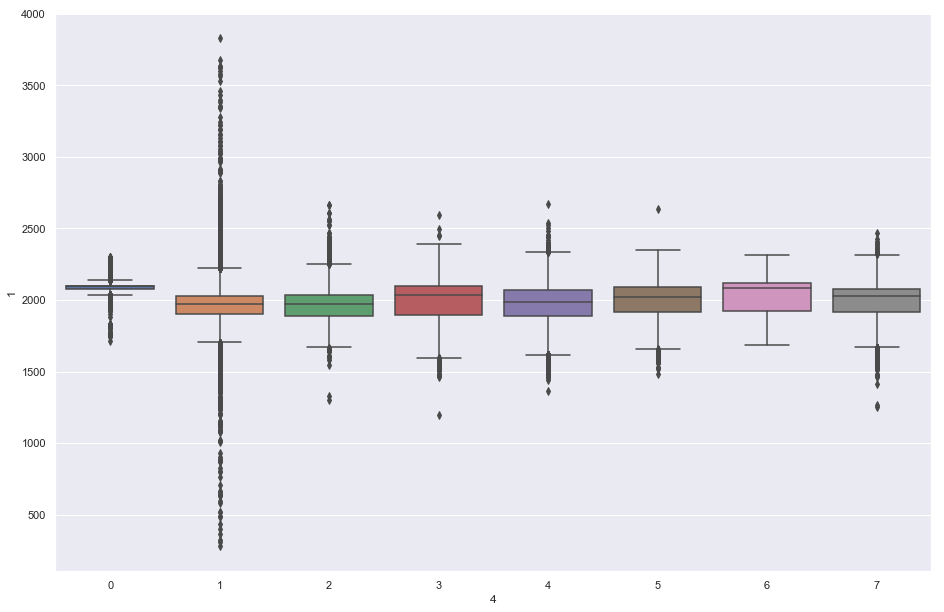

In [37]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x=df[4],y=df[1],
            data=d)
# sns.despine(offset=20, trim=True)

In [196]:
baseDir = r'.\Data'
li = []
for fileName in os.listdir(baseDir):
    currentFilePath = os.path.join(baseDir, fileName)
    df1 = pd.read_csv(currentFilePath, header=None)
    df1[0] = fileName
    li.append(df1)
df = pd.concat(li)
df[0].unique()

array(['1.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv',
       '15.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv',
       '8.csv', '9.csv'], dtype=object)

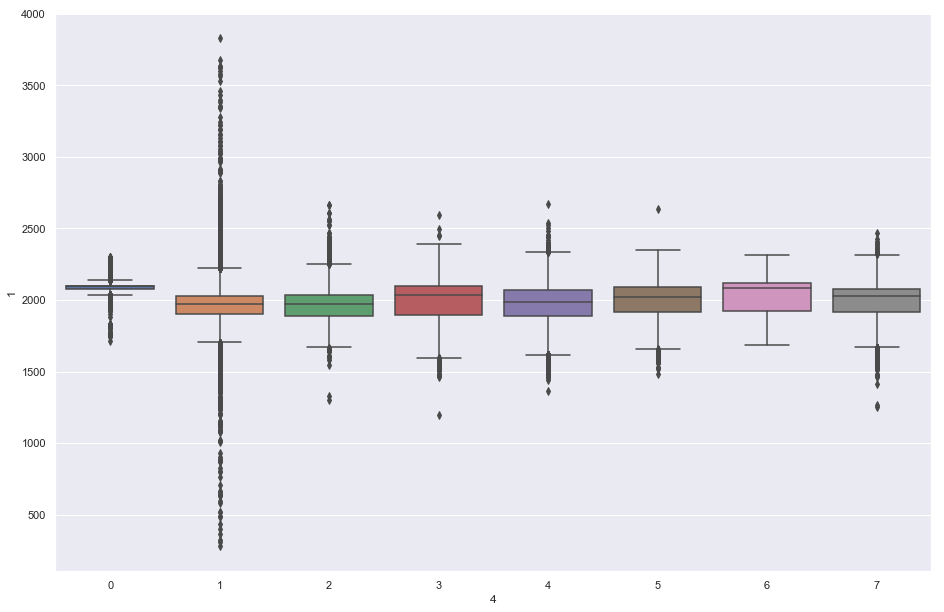

In [38]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x=df[4],y=df[1],
            data=df)

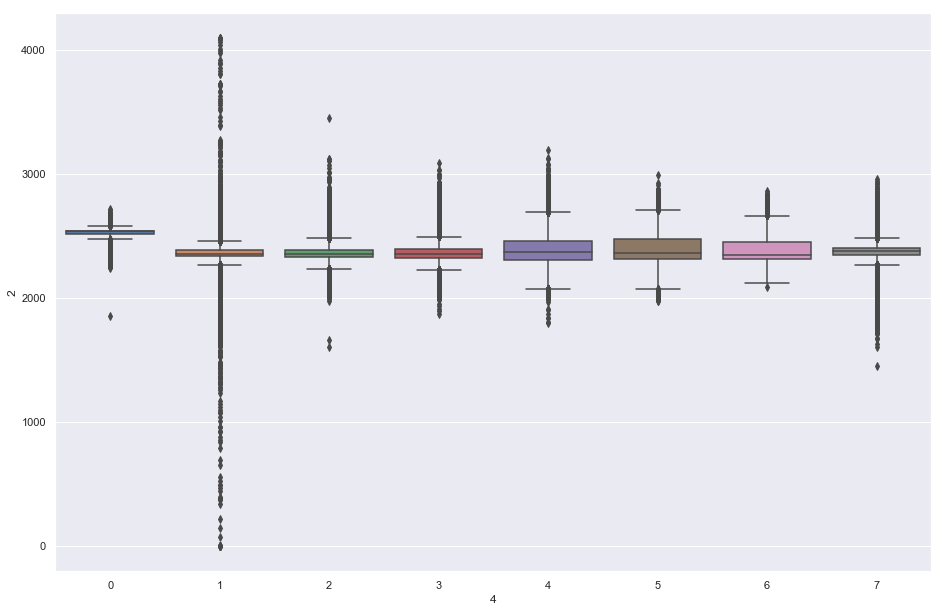

In [39]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x=df[4],y=df[2],
            data=df)

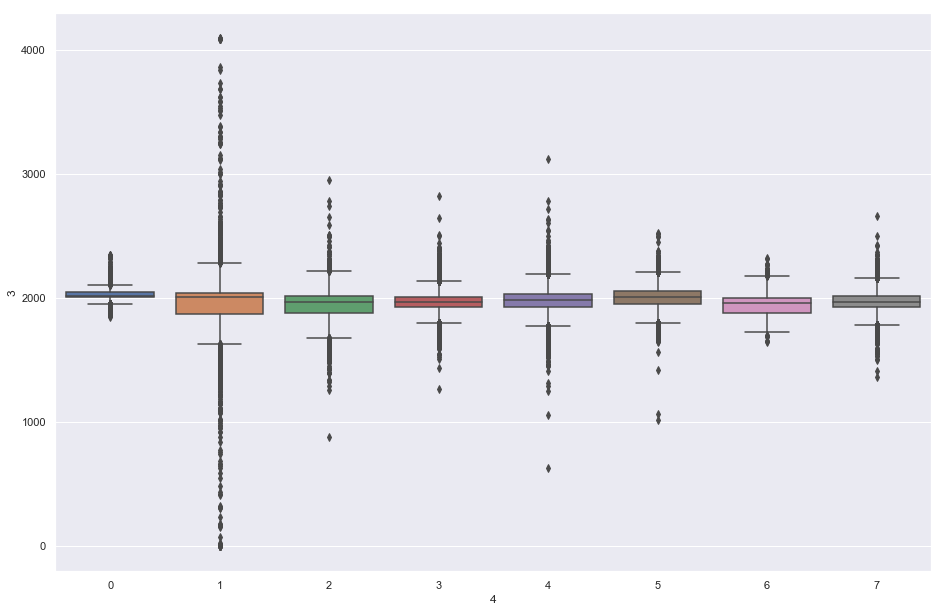

In [36]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x=df[4],y=df[3],
            data=df)

### Detecting Outlier using Z-Score
#### z_score = (observation - mean)/standard deviation

In [180]:
def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [181]:
for i in range(1,4):
    axis = detect_outliers(df[i])
    print(len(axis))

4620
19573
9300


In [182]:
df['z1'] = (df[1]-df[1].mean())/df[1].std()
df['z2'] = (df[2]-df[2].mean())/df[2].std()
df['z3'] = (df[3]-df[3].mean())/df[3].std()

In [183]:
df.head()

,0,1,2,3,4,z1,z2,z3
0,1.csv,1502,2215,2153,1,-4.361187,-1.669967,1.931039
1,1.csv,1667,2072,2047,1,-2.879477,-3.095475,0.808858
2,1.csv,1611,1957,1906,1,-3.382360,-4.241863,-0.683854
3,1.csv,1601,1939,1831,1,-3.472161,-4.421297,-1.477850
4,1.csv,1643,1965,1879,1,-3.094998,-4.162114,-0.969693


In [184]:
df_no = df[(df.z1>-3)&(df.z1<3)]
df_no = df[(df.z2>-3)&(df.z2<3)]
df_no = df[(df.z3>-3)&(df.z3<3)]

In [185]:
df_no.shape

(1917596, 8)

In [186]:
df.shape

(1926896, 8)

In [199]:
Q1 = df[1].quantile(0.25)
Q3 = df[1].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (df[1] >= Q1 - 1.5 * IQR) & (df[1] <= Q3 + 1.5 *IQR)
df1 = df.loc[filter]  

In [198]:
df.shape

(1926896, 5)

In [200]:
df1.shape

(1922991, 5)

In [201]:
Q1 = df[2].quantile(0.25)
Q3 = df[2].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (df[2] >= Q1 - 1.5 * IQR) & (df[2] <= Q3 + 1.5 *IQR)
df1 = df.loc[filter] 

In [202]:
Q1 = df[3].quantile(0.25)
Q3 = df[3].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (df[3] >= Q1 - 1.5 * IQR) & (df[3] <= Q3 + 1.5 *IQR)
df1 = df.loc[filter] 

In [203]:
df1.shape

(1878347, 5)

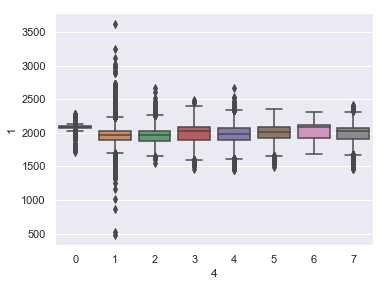

In [206]:
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.boxplot(x=df1[4],y=df1[1],
            data=df1)

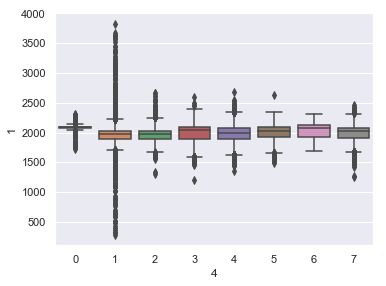

In [207]:
sns.set(rc={'figure.figsize':(5.7,4.27)})
sns.boxplot(x=df[4],y=df[1],
            data=df)

3: Standing
4: Walking
5: Going Up\Down Stairs
6: Walking and Talking with Someone

In [208]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames = ["KNN"]
    models=list()
    models.append(neighbors.KNeighborsClassifier())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            for k in range(5,21,4):
                model = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
                model.fit(Xtrain,ytrain)
                trainprediction=model.predict(Xtrain)
                testprediction=model.predict(Xtest)
                scores=list()
                scores.append(name+"-train")
                scores.append(metrics.accuracy_score(ytrain,trainprediction))
                stats.append(scores)
                scores=list()
                scores.append(name+"-test")
                scores.append(metrics.accuracy_score(ytest,testprediction))
                stats.append(scores)
                print("for k = ",k,"training accuracy = ",metrics.accuracy_score(ytrain,trainprediction),"testing accuracy = ",metrics.accuracy_score(ytest,testprediction))
        else:
            model.fit(Xtrain,ytrain)
            
        stats.append(scores)
        colnames=["MODELNAME","ACCURACY"]
#         break
    return pd.DataFrame(stats,columns=colnames)

In [210]:
df1 = df1[df1[4] != 0]
df1 = df1[df1[4] != 2]
df1 = df1[df1[4] != 5]

In [214]:
df1['m'] = (df1[1]+df1[2]+df1[3])/3
df1.head()

,0,1,2,3,4,m
0,1.csv,1502,2215,2153,1,1956.666667
1,1.csv,1667,2072,2047,1,1928.666667
2,1.csv,1611,1957,1906,1,1824.666667
3,1.csv,1601,1939,1831,1,1790.333333
4,1.csv,1643,1965,1879,1,1829.000000


In [215]:
X = df.drop([0,4], axis=1)
y = df[4]

In [216]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import utils
from sklearn import metrics
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn import feature_selection
from sklearn import naive_bayes
from sklearn import neighbors

In [218]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    stats=[]
    modelnames = ["KNN"]
    models=list()
    models.append(neighbors.KNeighborsClassifier())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            for k in range(29,35,2):
                model = neighbors.KNeighborsClassifier(n_neighbors=k, p=2)
                model.fit(Xtrain,ytrain)
                trainprediction=model.predict(Xtrain)
                testprediction=model.predict(Xtest)
                scores=list()
                scores.append(name+"-train")
                scores.append(metrics.accuracy_score(ytrain,trainprediction))
                stats.append(scores)
                scores=list()
                scores.append(name+"-test")
                scores.append(metrics.accuracy_score(ytest,testprediction))
                stats.append(scores)
                print("for k = ",k,"training accuracy = ",metrics.accuracy_score(ytrain,trainprediction),"testing accuracy = ",metrics.accuracy_score(ytest,testprediction))
        else:
            model.fit(Xtrain,ytrain)
            
        stats.append(scores)
        colnames=["MODELNAME","ACCURACY"]
#         break
    return pd.DataFrame(stats,columns=colnames)

In [220]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=.2,random_state=42)

In [221]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [229]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=30, random_state=0)
classifier.fit(Xtrain, ytrain)
y_pred = classifier.predict(Xtest)

In [230]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print(accuracy_score(ytest, y_pred))

0.7169884270071099


In [231]:
df1.head()

,0,1,2,3,4,m
0,1.csv,1502,2215,2153,1,1956.666667
1,1.csv,1667,2072,2047,1,1928.666667
2,1.csv,1611,1957,1906,1,1824.666667
3,1.csv,1601,1939,1831,1,1790.333333
4,1.csv,1643,1965,1879,1,1829.000000


In [233]:
df1['magnitude'] = (df1[1]**2+df1[2]**2+df1[3]**2)**1/2
df1.head()

,0,1,2,3,4,m,magnitude
0,1.csv,1502,2215,2153,1,1956.666667,5898819.0
1,1.csv,1667,2072,2047,1,1928.666667,5631141.0
2,1.csv,1611,1957,1906,1,1824.666667,5029003.0
3,1.csv,1601,1939,1831,1,1790.333333,4837741.5
4,1.csv,1643,1965,1879,1,1829.000000,5045657.5


In [3]:
baseDir = r'.\Data'
li = []
for fileName in os.listdir(baseDir):
    currentFilePath = os.path.join(baseDir, fileName)
    df = pd.read_csv(currentFilePath, header=None)
    df[0] = fileName
    li.append(df)
df = pd.concat(li)
df[0].unique()

array(['1.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv',
       '15.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv',
       '8.csv', '9.csv'], dtype=object)

In [4]:
df.head()

,0,1,2,3,4
0,1.csv,1502,2215,2153,1
1,1.csv,1667,2072,2047,1
2,1.csv,1611,1957,1906,1
3,1.csv,1601,1939,1831,1
4,1.csv,1643,1965,1879,1


In [253]:
for i in df[0].unique():
    dfu = df[df[0]==i]
    print(i, dfu.shape)

1.csv (2437515, 5)
10.csv (1902015, 5)
11.csv (1566765, 5)
12.csv (1720530, 5)
13.csv (1014765, 5)
14.csv (1741515, 5)
15.csv (1552515, 5)
2.csv (2070015, 5)
3.csv (1535115, 5)
4.csv (1833015, 5)
5.csv (2400015, 5)
6.csv (2113515, 5)
7.csv (2445015, 5)
8.csv (2070015, 5)
9.csv (2501115, 5)


In [254]:
df.head()

,0,1,2,3,4
0,1.csv,1502,2215,2153,1
1,1.csv,1667,2072,2047,1
2,1.csv,1611,1957,1906,1
3,1.csv,1601,1939,1831,1
4,1.csv,1643,1965,1879,1


In [11]:
df[3.1]=(df[1]**2+df[2]**2+df[3]**2)**(1/2)
df[3.2]=(df[1]+df[2]+df[3])/2 

In [12]:
df.head()

,0.0,1.0,2.0,3.0,4.0,3.1,3.2
0,1.csv,1502,2215,2153,1,3434.768988,2935.0
1,1.csv,1667,2072,2047,1,3355.932359,2893.0
2,1.csv,1611,1957,1906,1,3171.435952,2737.0
3,1.csv,1601,1939,1831,1,3110.543843,2685.5
4,1.csv,1643,1965,1879,1,3176.683018,2743.5


In [14]:
df[4.0].value_counts()

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: 4.0, dtype: int64

In [15]:
df = df[df[4] != 0]
df = df[df[4] != 6]
df = df[df[4] != 2]
df = df[df[4] != 5]
df[4].unique()

array([1, 3, 4, 7], dtype=int64)

In [18]:
df.rename(columns = {0.0:'filename', 1:'x_acc(pitch)', 2:'y_acc(roll)', 3:'z_acc(yaw)', 4:'label',3.1:"magnitude",3.2:"mean"}, inplace = True) 

In [19]:
df.head()

,filename,x_acc(pitch),y_acc(roll),z_acc(yaw),label,magnitude,mean
0,1.csv,1502,2215,2153,1,3434.768988,2935.0
1,1.csv,1667,2072,2047,1,3355.932359,2893.0
2,1.csv,1611,1957,1906,1,3171.435952,2737.0
3,1.csv,1601,1939,1831,1,3110.543843,2685.5
4,1.csv,1643,1965,1879,1,3176.683018,2743.5


In [39]:
def pgraphs(label,file):
    df1 = df[df['x_acc(pitch)'] & (df['label']==label) & (df['filename']==file)]
    plt.figure(figsize=(50,10))
    plt.plot(df1['x_acc(pitch)'])

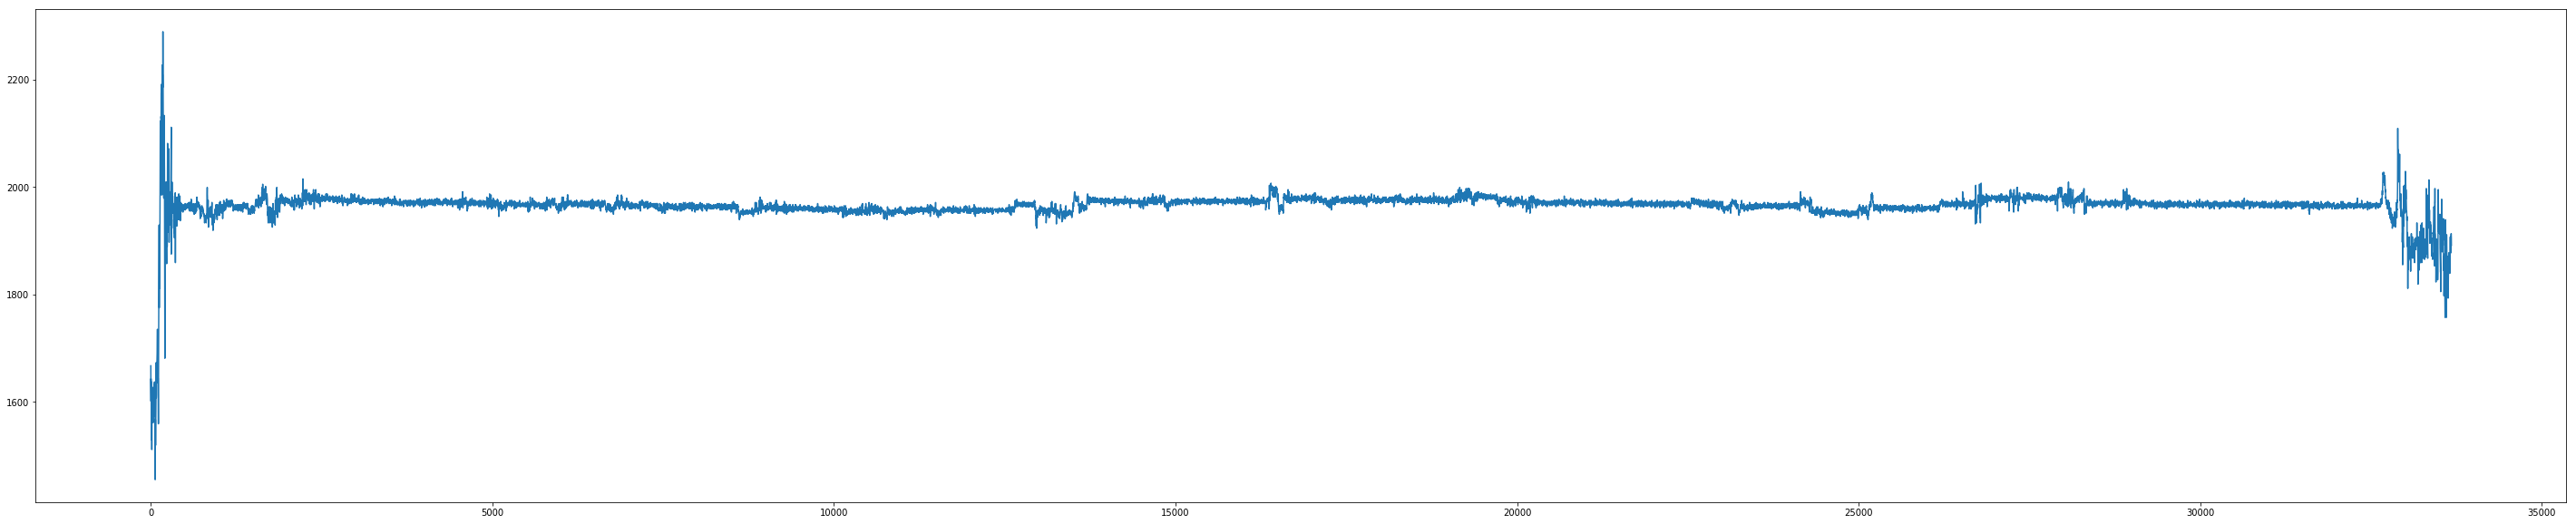

In [41]:
pgraphs(1,'1.csv')

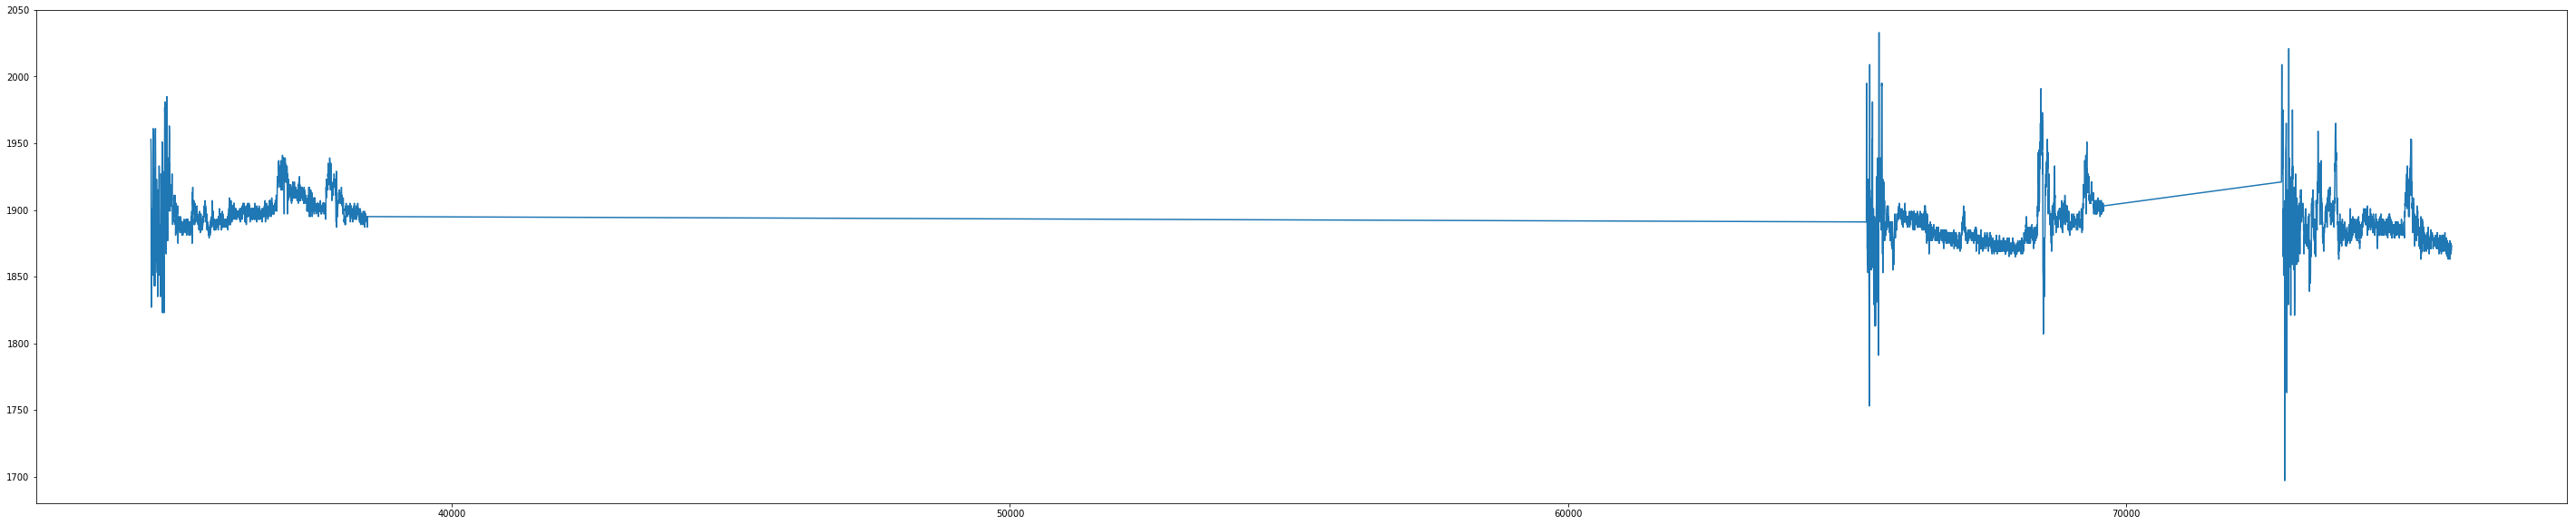

In [50]:
pgraphs(3,'1.csv')

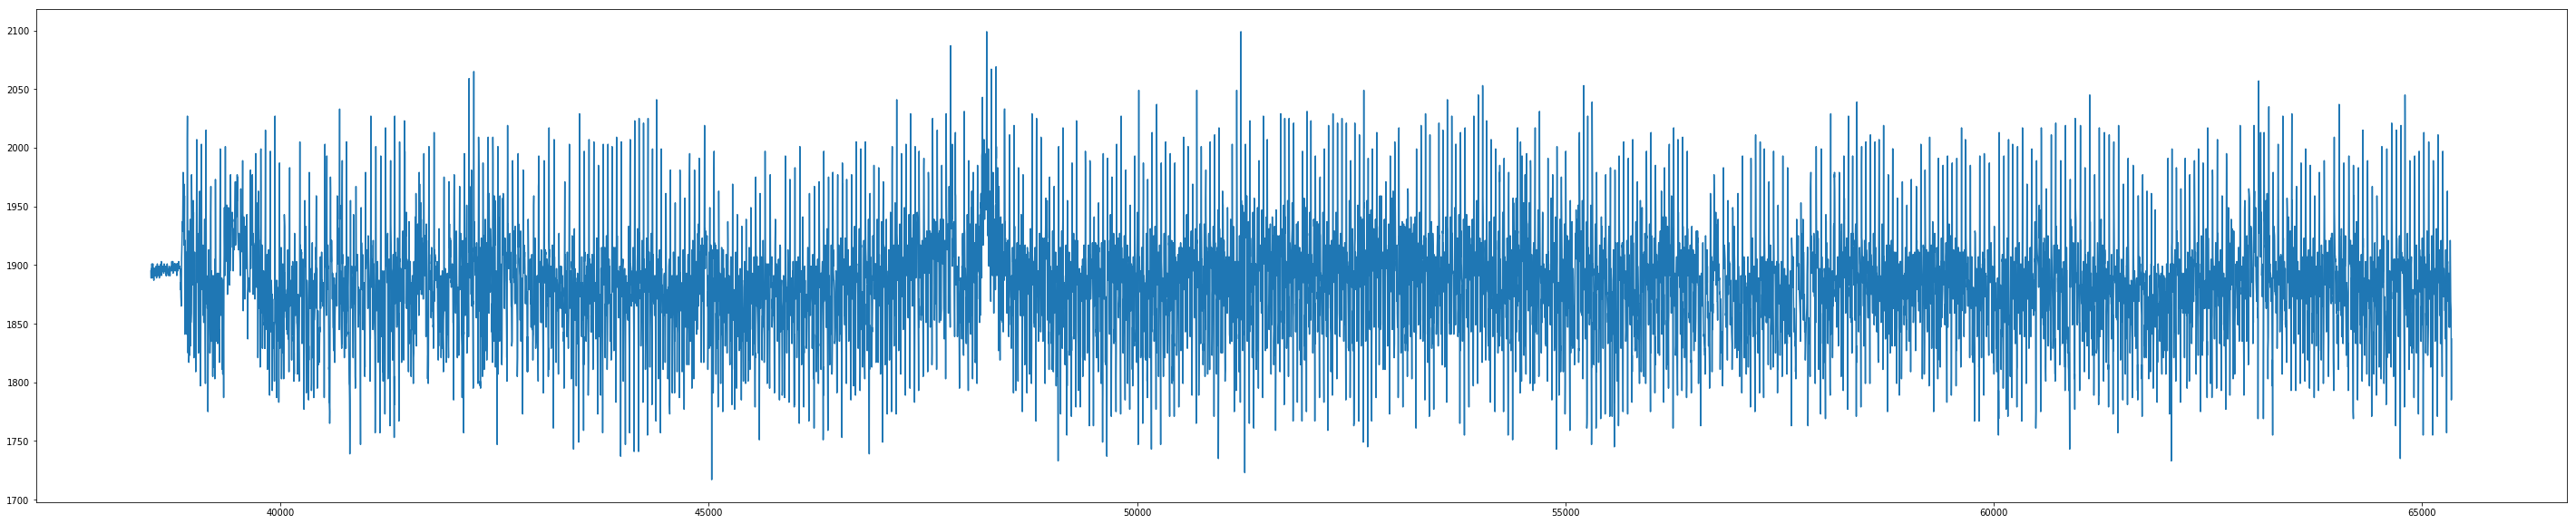

In [51]:
pgraphs(4,'1.csv')

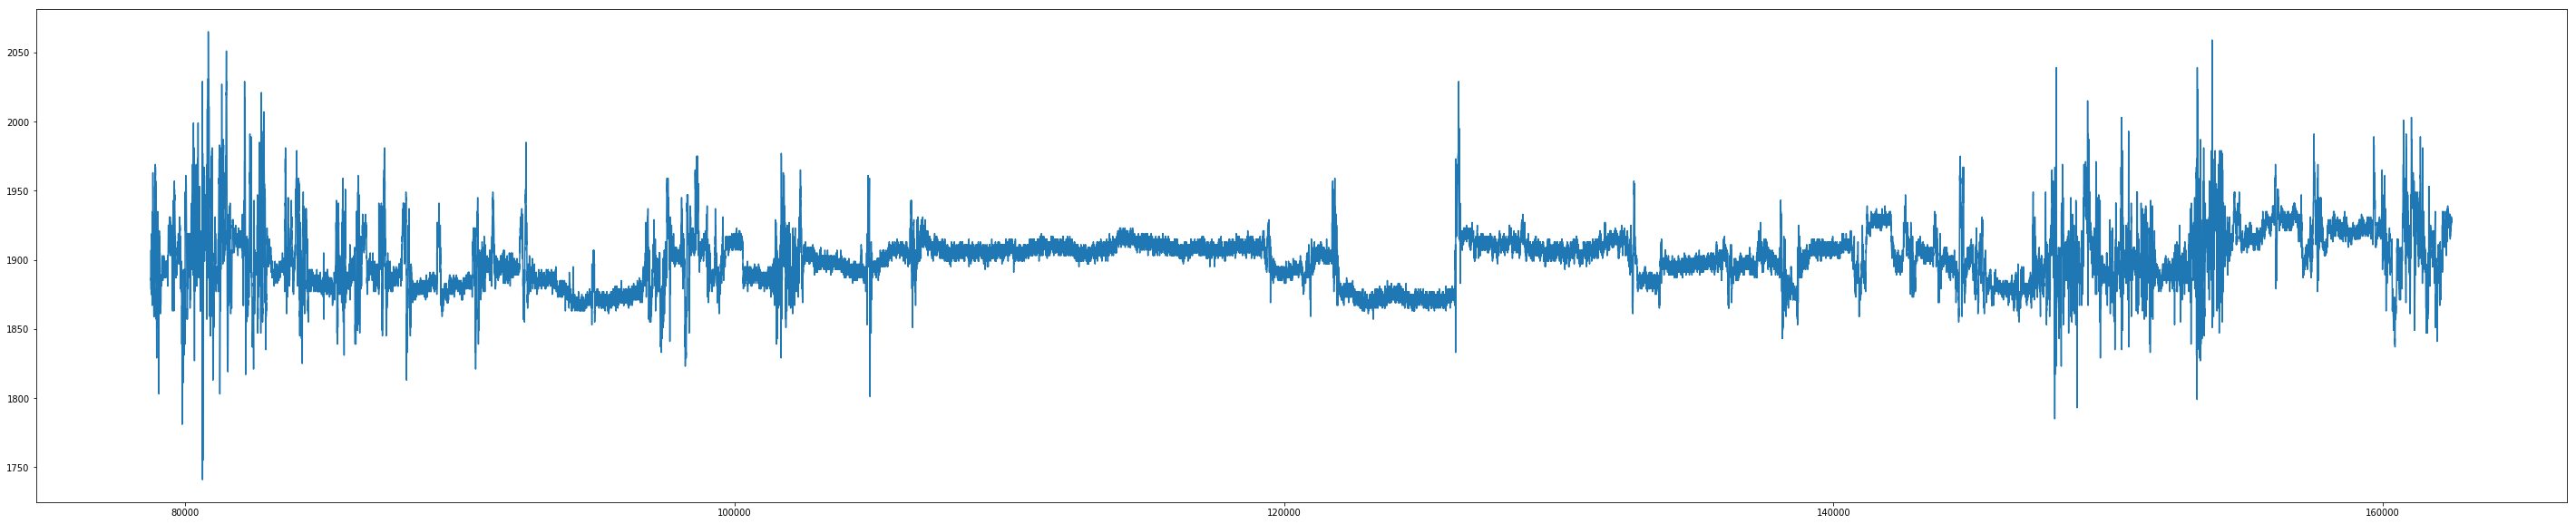

In [47]:
pgraphs(7,'1.csv')